In [11]:
# import numpy with random function rand
import math
import numpy as np
from numpy import random
from itertools import combinations
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')  # Colorblind-friendly style

{(np.float64(-2.7272727272727275), np.float64(-0.7070707070707076)), (np.float64(-8.181818181818182), np.float64(3.1313131313131315)), (np.float64(-1.1111111111111107), np.float64(4.141414141414142)), (np.float64(2.929292929292929), np.float64(7.777777777777779)), (np.float64(7.575757575757574), np.float64(7.777777777777779)), (np.float64(3.5353535353535346), np.float64(-7.575757575757576)), (np.float64(3.5353535353535346), np.float64(1.7171717171717162)), (np.float64(-5.757575757575758), np.float64(7.575757575757574)), (np.float64(6.767676767676768), np.float64(-2.121212121212121)), (np.float64(-0.5050505050505052), np.float64(7.777777777777779))}


Text(0.5, 1.0, 'Random 2D Points')

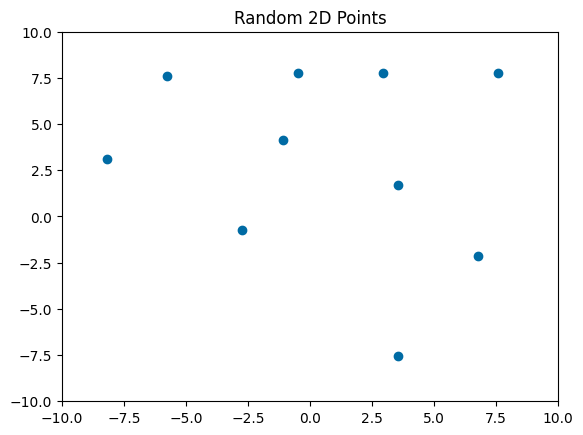

In [12]:
# Random seed for reproducibility
random.seed(0)
# Define a range of [x_1,x_2] and [y_1,y_2] values
x_vals = np.linspace(-10, 10, 100)  # 100 valores en [-10, 10]
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)  
# Cartesian product [x_1,x_2]⨉[y_1,y_2] ⊂ R^2
grid = set(list(zip(X.ravel(), Y.ravel())))
# Generator points P_g = {p_1,p_2,...,p_k} ⊂ R^2
mesh = np.column_stack((random.choice(x_vals, 10), random.choice(y_vals, 10)))  # 10 random 2D points
P_g = set(map(tuple, mesh))
print(P_g)
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Random 2D Points')

In [ ]:
# Distance function euclidean: d = √ (x_1 - x_2)^2 + (y_1 - y_2)^2
d = lambda p_1, p_2: np.sqrt((p_1[0] - p_2[0])**2 + (p_1[1] - p_2[1])**2)
# k-order Voronoi polygon proposition: p ∈ VP_i ⇔ max_{p_h ∈ Pk_i} d(p, p_h) ≤ min_{p_j ∈ P_g\Pk_i} d(p, p_j)
proposition = lambda p, Pk_i, P_g: max([d(p, p_h) for p_h in Pk_i]) <= min([d(p, p_j) for p_j in P_g - Pk_i])
# Binomial coefficient: 𝓁(n, k) = n! / (k!(n-k)!)
l = lambda n, k: math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
# All possible subsets of size k from P_g: A_k = {{p_11, ..., p_1k}, ..., {p_l1, ..., p_lk}} and {p_i1, ..., p_ik}_{i=1,...,l} ⊂ P_g
def A_k(P_g:set, k:int) -> set:
    set_of_subsets = list(set(p_k) for p_k in combinations(P_g, k))
    # Check if the number of subsets is correct: |Pk| = l(|P_g|, k)
    assert len(set_of_subsets) == l(len(P_g), k), "The number of subsets is incorrect"
    return set_of_subsets
# Compute k-order Voronoi polygon VP_i = {p ∈ grid | proposition(p, Pk_i, P)}
VP_i_compute = lambda Pk_i, P, grid: set(p for p in grid if proposition(p, Pk_i, P))
# k-order Voronoi diagram V = {VP_i | i = 1,...,l}
def V_diagram(Pk:set, P:set, grid:set) -> list:
    voronoi_diagram = []
    for Pk_i in Pk:
        VP_i = VP_i_compute(Pk_i, P, grid)
        if VP_i != set(): # Empty set means proposition(p, Pk_i, P) == False for all p in grid
            voronoi_diagram.append((Pk_i, VP_i))
    return voronoi_diagram

In [14]:
k = 4 # k-order Voronoi diagram
Pk = A_k(P_g, k) # All possible subsets of size k from P_g
voronoi_diagram = V_diagram(Pk, P_g, grid)

Text(0.5, 1.0, 'Random 2D Points')

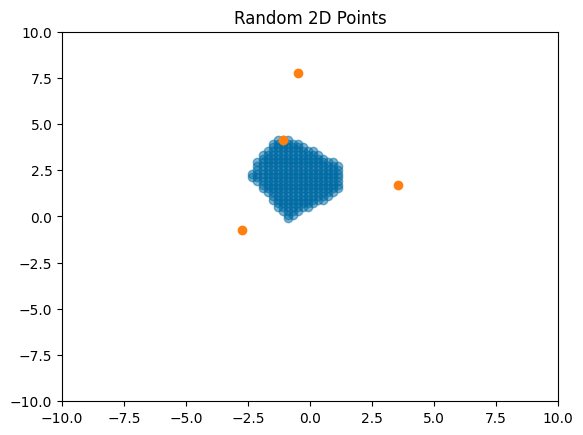

In [23]:
i = 10
Pk_i = voronoi_diagram[i][0]
VP_i = voronoi_diagram[i][1]
plt.scatter(np.array(list(VP_i))[:, 0], np.array(list(VP_i))[:, 1], alpha=0.5)
plt.scatter(np.array(list(Pk_i))[:, 0], np.array(list(Pk_i))[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Random 2D Points')

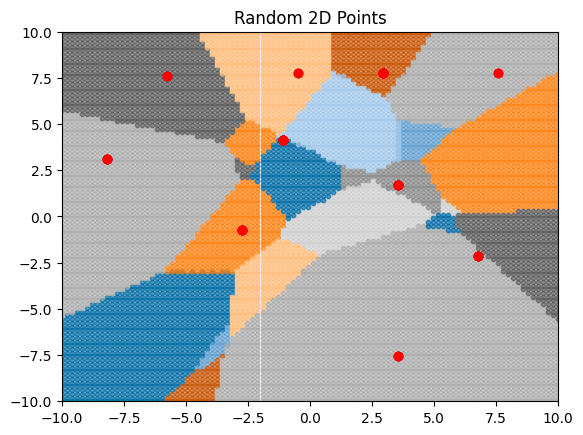

In [21]:
fig, ax = plt.subplots()
for i in range(len(voronoi_diagram)):
    Pk_i = voronoi_diagram[i][0]
    VP_i = voronoi_diagram[i][1]
    ax.scatter(np.array(list(VP_i))[:, 0], np.array(list(VP_i))[:, 1], s=10, alpha=0.7)
    ax.scatter(np.array(list(Pk_i))[:, 0], np.array(list(Pk_i))[:, 1], color='red')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title('Random 2D Points')